In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# **The Sparks Foundation - Data Science and Business Analytics Internship**

# Task1 - Prediction using Supervised ML

**Predict the percentage of an student based on the no. of study hours.**

**Author : Mihir Chakkarwar**

# **Importing libraries**

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# **Reading the data**

In [19]:

filename = '../input/student-scores-and-hours/StudScore_Hours.csv'
df = pd.read_csv(filename)

In [20]:
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# **Fitting the dataset**

In [21]:
x=df.iloc[:,:-1].values
y=df.iloc[:,1].values

# **Splitting the dataset into training and testing sets**

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

# **Training the simple linear regression model on the training set**

In [23]:
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

# **Predicting the test set result**

In [24]:
y_pred = regressor.predict(x_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

# **Checking the R-squared score of the model**

In [25]:
print('R-squred score (training) : {:.3f}'
     .format(regressor.score(x_train, y_train)))
print('R-squred score (test) : {:.3f}'
     .format(regressor.score(x_test, y_test)))

R-squred score (training) : 0.952
R-squred score (test) : 0.945


# **Visualising the Training set**

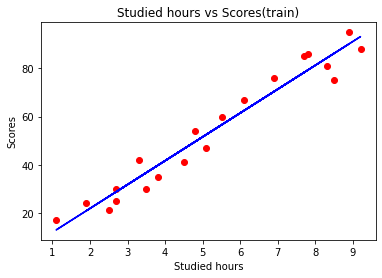

In [27]:
plt.scatter(x_train, y_train, color='red')
plt.plot(x_train, regressor.predict(x_train), color='blue')
plt.title('Studied hours vs Scores(train)')
plt.xlabel('Studied hours')
plt.ylabel('Scores')
plt.show()


# **Visualising the Test set**

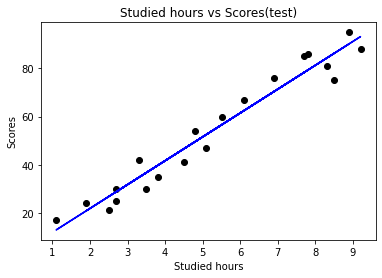

In [28]:
plt.scatter(x_train, y_train, color='black')
plt.plot(x_train, regressor.predict(x_train), color='blue')
plt.title('Studied hours vs Scores(test)')
plt.xlabel('Studied hours')
plt.ylabel('Scores')
plt.show()

# **Predicting the score when a student puts in 9.25 hrs of studying time**

In [29]:
answer = regressor.predict([[9.25]])
print("When a student puts in 9.25 hours, he is expected to get a score of {}.".format(answer))

When a student puts in 9.25 hours, he is expected to get a score of [93.69173249].


# **Evaluating the model**

In [30]:
y_pred = regressor.predict(x_test)

In [32]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002982


# **Thus the model is approx 86% accurate**